In [9]:
from PixelCNN.gated_cnn import MaskedCNN
from PixelCNN.model import PixelCNN
import torch
from Diffusion.diffusion_model import DiffusionModel
import matplotlib.pyplot as plt

In [8]:
from importlib import reload
import PixelCNN.gated_cnn

import PixelCNN.kernel_filter
reload(PixelCNN.kernel_filter)

reload(PixelCNN.gated_cnn)

<module 'PixelCNN.gated_cnn' from 'd:\\Programming\\LearnPy\\Cars_Diffusion\\PixelCNN\\gated_cnn.py'>

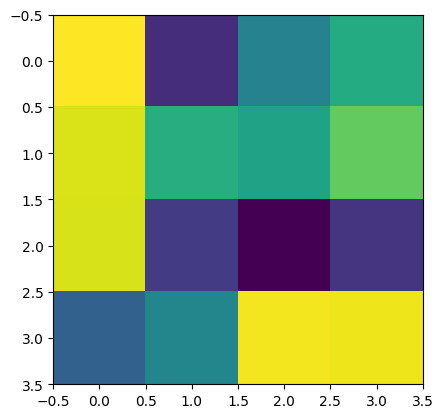

In [89]:
img = torch.randint_like(torch.zeros(1,4,4), 0, 256)
plt.imshow(img.permute(1,2,0).type(torch.uint8))

In [94]:
masked_cnn = MaskedCNN(1, 1)

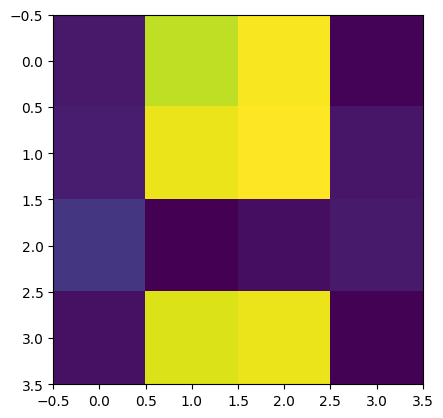

In [96]:
masked_cnn.eval()

output = None
with torch.no_grad():
    output = masked_cnn(img.unsqueeze(0))

plt.imshow(output.squeeze(0).permute(1,2,0).type(torch.uint8))

In [ ]:
from PixelCNN.kernel_filter import kernel_filter

f = kernel_filter(
    1, 1, 6, 3, data_channels=3, first_layer=False, horizontal=False
)
print(f)

f.shape

tensor([[[[1.]],

         [[0.]],

         [[0.]]],


        [[[1.]],

         [[0.]],

         [[0.]]],


        [[[1.]],

         [[1.]],

         [[0.]]],


        [[[1.]],

         [[1.]],

         [[0.]]],


        [[[1.]],

         [[1.]],

         [[1.]]],


        [[[1.]],

         [[1.]],

         [[1.]]]])


torch.Size([6, 3, 1, 1])

In [27]:

import numpy as np
import torch

out_channels = 6
in_channels = 3
data_channels = 3
mask_type = 'A'  # 'A' or 'B'

weight = np.random.randn(out_channels, in_channels, 1, 1)

xc, yc = 0, 0



mask = np.zeros(weight.shape, dtype=np.float32)
mask[:, :, :yc, :] = 1
mask[:, :, yc, :xc + 1] = 1

def cmask(out_c, in_c):
    a = (np.arange(out_channels) % data_channels == out_c)[:, None]
    b = (np.arange(in_channels) % data_channels == in_c)[None, :]
    return a * b

for o in range(data_channels):
    for i in range(o + 1, data_channels):
        mask[cmask(o, i), yc, xc] = 0

if mask_type == 'A':
    for c in range(data_channels):
        mask[cmask(c, c), yc, xc] = 0

mask = torch.from_numpy(mask).float()

In [28]:
mask

tensor([[[[0.]],

         [[0.]],

         [[0.]]],


        [[[1.]],

         [[0.]],

         [[0.]]],


        [[[1.]],

         [[1.]],

         [[0.]]],


        [[[0.]],

         [[0.]],

         [[0.]]],


        [[[1.]],

         [[0.]],

         [[0.]]],


        [[[1.]],

         [[1.]],

         [[0.]]]])

In [33]:
!pip install torchinfo --break-system-packages

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
import PixelCNN.gated_cnn
reload(PixelCNN.gated_cnn)

import PixelCNN.model
reload(PixelCNN.model)

import PixelCNN.config
reload(PixelCNN.config)


<module 'UNetModel.config' from '/mnt/d/Programming/LearnPy/Cars_Diffusion/UNetModel/config.py'>

In [3]:
from PixelCNN.model import PixelCNN
from torchinfo import summary
from PixelCNN.config import Config

cfg = Config()

model = PixelCNN(cfg)

In [10]:
images = torch.rand(2, 3, 32, 32)
labels = torch.ones(2, dtype=torch.long)
time = torch.ones(2, dtype=torch.long)

In [19]:
import PixelCNN.model
reload(PixelCNN.model)

import PixelCNN.gated_cnn
reload(PixelCNN.gated_cnn)

<module 'PixelCNN.gated_cnn' from 'd:\\Programming\\LearnPy\\Cars_Diffusion\\PixelCNN\\gated_cnn.py'>

In [20]:
from PixelCNN.gated_cnn import GatedCNNBlock

# io = GatedCNNIO(v=images, h=images, label=labels, skip=None)

masked_cnn = GatedCNNBlock(
    3, 6, 3, 3, first_layer=True
)
masked_cnn.eval()
skip = torch.rand(2, 6, 32, 32)
summary(masked_cnn, input_data={'x': (images, images, skip, labels, time)}, device='cpu')

Layer (type:depth-idx)                   Output Shape              Param #
GatedCNNBlock                            [2, 6, 32, 32]            --
├─MaskedCNN: 1-1                         [2, 12, 32, 32]           336
├─MaskedCNN: 1-2                         [2, 12, 32, 32]           156
├─MaskedCNN: 1-3                         [2, 12, 32, 32]           120
├─MaskedCNN: 1-4                         [2, 6, 32, 32]            42
Total params: 654
Trainable params: 654
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0
Input size (MB): 0.10
Forward/backward pass size (MB): 0.69
Params size (MB): 0.00
Estimated Total Size (MB): 0.79

In [ ]:
images = torch.rand(2, cfg.hidden_channels, 32, 32)
io = (images, images, torch.tensor(0), labels, time)

first_layer = GatedCNNBlock(
    in_channels=cfg.num_channels,
    out_channels=cfg.hidden_channels,
    kernel_height=7, kernel_width=7,
    first_layer=True, residual=False,
    blinded=False
)

summary(first_layer, input_data=[io], device='cpu')

Layer (type:depth-idx)                   Output Shape              Param #
GatedCNNBlock                            [2, 192, 32, 32]          --
├─MaskedCNN: 1-1                         [2, 384, 32, 32]          56,832
├─MaskedCNN: 1-2                         [2, 384, 32, 32]          147,840
├─MaskedCNN: 1-3                         [2, 384, 32, 32]          8,448
├─MaskedCNN: 1-4                         [2, 192, 32, 32]          37,056
Total params: 250,176
Trainable params: 250,176
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0
Input size (MB): 0.05
Forward/backward pass size (MB): 22.02
Params size (MB): 1.00
Estimated Total Size (MB): 23.07

In [151]:
summary(model, input_data=[(images, labels)])

skip shape torch.Size([2, 192, 32, 32])
label embedding shape torch.Size([2, 192, 1, 1])


Layer (type:depth-idx)                   Output Shape              Param #
PixelCNN                                 [2, 768, 32, 32]          --
├─GatedCNNBlock: 1-1                     [2, 192, 32, 32]          --
│    └─MaskedCNN: 2-1                    [2, 384, 32, 32]          56,832
│    └─MaskedCNN: 2-2                    [2, 384, 32, 32]          147,840
│    └─MaskedCNN: 2-3                    [2, 384, 32, 32]          8,448
│    └─MaskedCNN: 2-4                    [2, 192, 32, 32]          37,056
├─ModuleList: 1-2                        --                        --
│    └─GatedCNNBlock: 2-5                [2, 192, 32, 32]          --
│    │    └─MaskedCNN: 3-1               [2, 384, 32, 32]          663,936
│    │    └─MaskedCNN: 3-2               [2, 384, 32, 32]          147,840
│    │    └─MaskedCNN: 3-3               [2, 384, 32, 32]          221,568
│    │    └─Embedding: 3-4               [2, 384]                  2,688
│    │    └─MaskedCNN: 3-5               [2, 192, 3